# Polynomial Regression

We can use a linear model to fit nonlinear data. 

A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. 

In [1]:
import numpy as np

In [37]:
m = 100
X = 10 * np.random.rand(m, 1) - 5
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

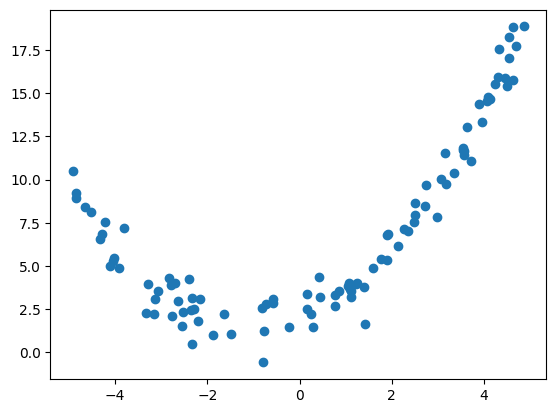

In [32]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

**Scikit learn PolynomialFeatures**

We can use Scikit-Learn’s Poly nomialFeatures class to transform our training data,adding the square (2nd-degree polynomial) of each feature in the training set as new features

- PolynomialFeatures adds all combinations of features up to the given degree. 
- For example, if there were two features a and b, PolynomialFeatures with degree=3 would not only add the features a2, a3, b2, b3, but also the combinations ab, a2b, and ab2.

- PolynomialFeatures(degree=d) transforms an array containing n features into an array containing $\frac{(n + d )!}{d!n!}$ features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = poly_features.fit_transform(X)

In [ ]:
print(X[0])
print(X_poly[0])

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

## learning curves

These are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration). 

To generate the plots, simply train the model several times on different sized subsets of the training set. 

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

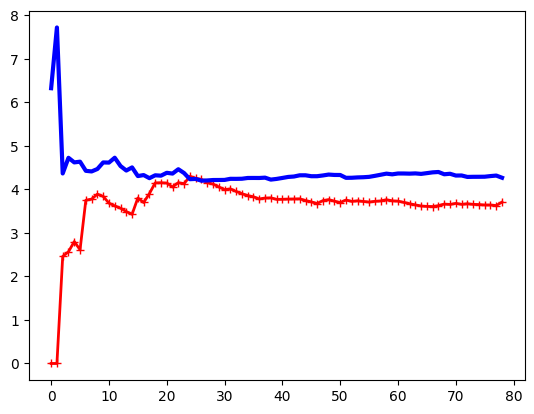

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

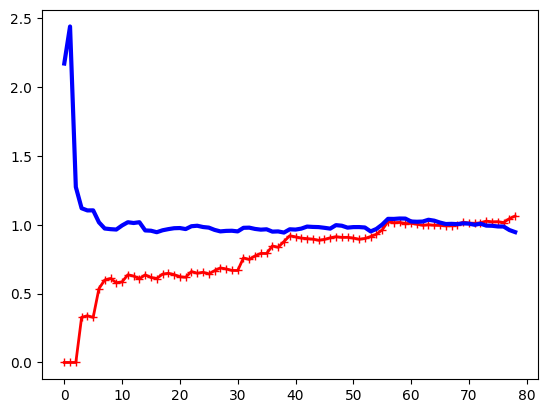

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)